# 最短路径算法

最短路径算法是计算机网络里一个常用的路由算法，该算法可以找出网络中从一个节点到另一个节点的最短路径。假设有一个网络，其拓扑如下图所示，图中一共有8个节点，为节点A到节点H，相邻节点间的距离标注在边上，如节点A到节点B的距离为2。现在，假如从节点A出发，要到达节点D，最短路径应该是怎样呢？

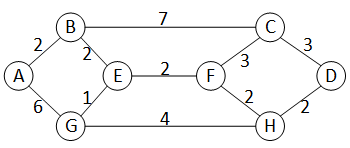
图1

1959年，Dijkstra提出了最短路径算法，根据该算法，可以找出任意两节点之间的最短网络路径。对图1来说，从节点A到节点D的最短路径应该是A->B->E->F->H->D。具体的过程如下所示：

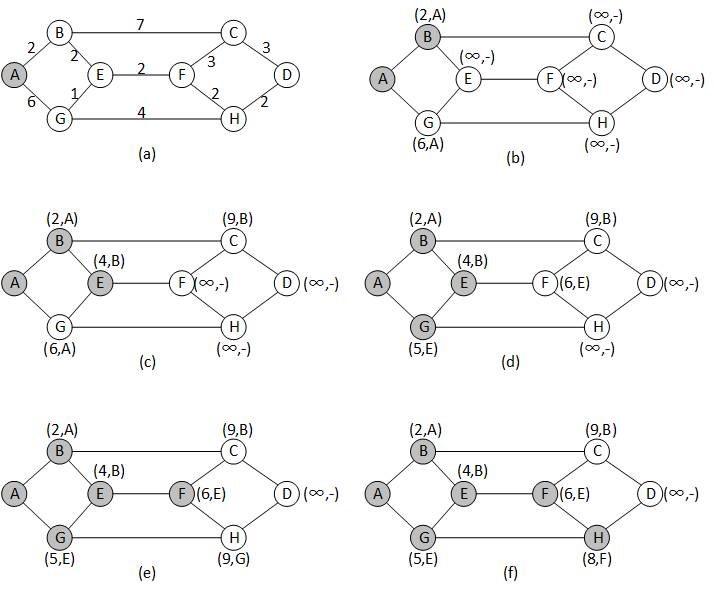
图2

首先，为每一个节点添加一个标签（label），并全部初始化为(∞,-)。标签左边的数值表示从源节点（source node）到该节点最短路径的长度，右边的字符表示走最短路径时该节点的上一个节点。接着，从节点A出发，搜索下一步可以到达的节点，在本例中是B和G，将B和G的标签更新为(2,A)和(6,A)，表示从A节点出发，到B节点的最短路径长度为2，到G节点的最短路径长度为6。然后，在所有的试探节点（tentative node）中，选出路径长度最短的那一个，将其标注为永久节点（permanent node）。试探节点的标签，左边的数值为非无穷的一个数值，且没有阴影。永久节点在图中则一律加阴影显示。试探节点代表了最短路径的一种可能，就是说走最短路径有可能会经过该节点，但也可能不经过，但是现在还无法确定，所以先用标签记一下，记录在目前所搜集到的信息下，从源节点到该节点最短需要走多长的路，但是这个值并不代表最后真实的最短路径值，因为后面继续搜索的话，可能会发现更短的路径，这个试探节点的数值也会相应的更新为更小的那个数，所以这就是为什么会把它叫做试探节点。永久节点的标签则不会再变，它的数值就代表了从源节点到该节点所有可能路径中最短路径的长度。每一步都会从所有试探节点中选出数值最小的那一个，然后将该试探节点转为永久节点。在图b中，试探节点有B和G，B的标签数值为2，而C为6，所以选择将B转为永久节点。同理，在图c中E和C都是试探节点，但是E的标签数值为4，而B为9，所以选择将数值更小的试探节点，即E，转为永久节点。图d中，有一点值得注意，G节点的标签在c中的(6,A)，为什么到了d会变成(5,E)呢？这是因为原来我们在第一次试探的时候，我们是从A直接走到G，这样路程长度就为6。但是现在，我们在对E节点的下一步试探的时候，我们发现从E走到G只要走长度为1的路程，再加上从A走到E的路程，长度也才只有5，比从A直接到G还要短，所以我们认为从A走到G的最短路径长度应该是5，而不是6，所以我们把G的标签值给更新了。把G更新后，在图d中，现有的试探节点有C、F、G这三个，其中G的标签数值最小，所以选择将G转为永久节点。同理，在图f中，发现从A走到F，再从F走到H的话，总共只要走长度为8的路程，比之前试探到的最短路径还要短，所以把H的标签从图e的(9,G)更新为图f的(8,F)。更新之后，图f的试探节点有C和H，选择数值更小的H转为永久节点。这时，最近更新的永久节点为H，从H开始出发，搜索H下一步能到达的所有节点（不能是永久节点，因为已经固定了，不能再往回走），发现从H只能到D，将D的标签更新为(10,H)。现在，试探节点只剩下了C和D，C的值比D的小，所以C转为永久节点。最后，试探节点只剩下D，最近更新的永久节点为C，从C出发搜索下一步能到达的节点，只有D。从C到D长度为3，则从A到C再到D长度为12，比从A到H再到D要大，所以不更新D的标签，还是按照原来的路走。然后从所有试探节点选出数值最小那个转为永久节点，这里只有D，所以将D转为永久节点。D一旦转为永久节点，就意味着从A到D的最短路径就此确定了。此时，往回推就能画出一条最短路径。如图所示。

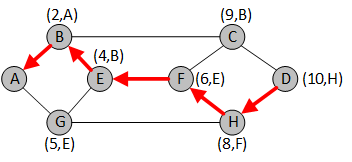
图3

所以，从A到D最短的路径为A->B->E->F->H->D。最短路径算法代码如下。

In [ ]:
MAX_NODE = 8
INFINITY = 1000000000

class State:
    def __init__(self):
        self.predecessor = -1
        self.length = INFINITY
        self.label = "tentative"

def shorttest_path(s: int, t: int, path) -> None:
    nodes = [State * MAX_NODE]
    print(nodes)
    
if __name__ == "__main__":
    shorttest_path(0, 8, 1)